# 反爬：驗證碼處理

* 了解「驗證碼機制」的反爬蟲機制
* 「驗證碼機制」反爬蟲的因應策略


## 作業目標

* 讀讀看「test」資料夾下的圖檔！
* 像 test/test2.png 這種複雜的圖片怎麼辦？


### 讀讀看「test」資料夾下的圖檔！

In [4]:
!pip install pytesseract
!pip install opencv-python

  Created wheel for pytesseract: filename=pytesseract-0.3.1-py2.py3-none-any.whl size=13379 sha256=6e7e9d8dbf93441aa3d701a2269708c8158fbc6dcc5ecabff1bfc0179e522722
  Stored in directory: C:\Users\User-498477\AppData\Local\pip\Cache\wheels\01\84\d2\10729e740ad8f5c5d3b02d10c7f15afeaa390f7723bd59dbd7
Successfully built pytesseract


In [5]:
import requests
import pytesseract
from PIL import Image
from io import BytesIO  # StringIO和BytesIO是在内存中操作str和bytes的方法
import cv2
from matplotlib import pyplot as plt

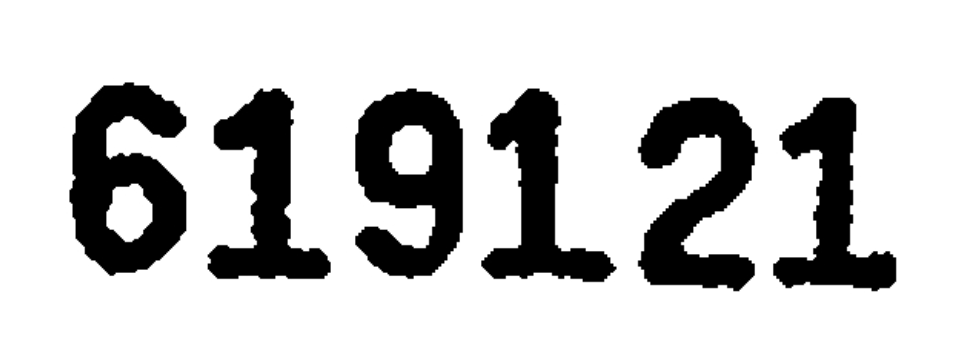

In [3]:
# 讀test1檔案
test1 = Image.open('../Data/pic/test1.png')
test1

In [12]:
# 要先指定Tesseract-OCR路徑才可以成功
pytesseract.pytesseract.tesseract_cmd = 'D:/Tesseract-OCR/tesseract.exe'

In [7]:
# 用pytesseract解析看看
parsetest1 = pytesseract.image_to_string(test1)
parsetest1

'619121'

### 像 test/test2.png 這種複雜的圖片怎麼辦？

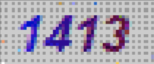

In [9]:
# 讀取test2
test2 = Image.open('../Data/pic/test2.png')
test2

轉換圖片色彩模式有：1，L，P，RGB，RGBA，CMYK，YCbCr，I，F。[這個網站有詳細範例](https://blog.csdn.net/icamera0/article/details/50843172) 
1. 模式“1”为二值图像，非黑即白。但是它每个像素用8个bit表示，0表示黑，255表示白。下面我们将lena图像转换为“1”图像
2. 模式“L”为灰色图像，它的每个像素用8个bit表示，0表示黑，255表示白，其他数字表示不同的灰度。在PIL中，从模式“RGB”转换为“L”模式是按照下面的公式转换的：L = R * 299/1000 + G * 587/1000+ B * 114/1000
3. 模式“P”为8位彩色图像，它的每个像素用8个bit表示，其对应的彩色值是按照调色板查询出来的。

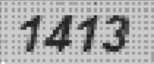

In [11]:
test2 = Image.open('../Data/pic/test2.png').convert("L")
test2

In [12]:
# 用pytesseract試試
parsetest2 = pytesseract.image_to_string(test2)
parsetest2

'1413'

In [7]:
import urllib

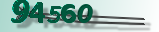

In [15]:
# 這個驗證碼的網址，每一次連都抓到不一樣的圖案 @_@
firstbank_imgurl = 'https://ebank.firstbank.com.tw/PTLB2C/CaptchaServlet?regen=Y&timestamp=1578634525841'

Img = urllib.request.urlretrieve(firstbank_imgurl, '../Data/pic/imgtest.png')
Img = Image.open('../Data/pic/imgtest.png')
Img

In [16]:
# 試試看pytesseract，抓不到呢!
parseImg = pytesseract.image_to_string(Img)
parseImg

''

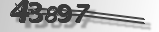

In [14]:
Img

In [24]:
pixdata = Img.load()  #<PixelAccess at 0x2bdfc313f90>

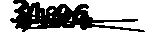

In [25]:
w ,h = Img.size
for y in range(h):
    for x in range(w):
        if pixdata[x,y] < 180:
            pixdata[x,y] = 0
        else:
            pixdata[x,y] = 255
Img

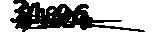

In [41]:
# 對二值化圖片降噪
pixdata = Img.load()
w,h = Img.size
# 8鄰域演算法
for y in range(1,h-1):
    for x in range(1,w-1):
        count = 0
        if pixdata[x,y-1] > 245:#上
            count = count + 1
        if pixdata[x,y+1] > 245:#下
            count = count + 1
        if pixdata[x-1,y] > 245:#左
            count = count + 1
        if pixdata[x+1,y] > 245:#右
            count = count + 1
        if pixdata[x-1,y-1] > 245:#左上
            count = count + 1
        if pixdata[x-1,y+1] > 245:#左下
            count = count + 1
        if pixdata[x+1,y-1] > 245:#右上
            count = count + 1
        if pixdata[x+1,y+1] > 245:#右下
            count = count + 1
        if count > 4:
            pixdata[x,y] = 255

Img

In [43]:
import cv2

In [44]:
cv2.__version__

'4.1.2'

In [17]:
img = cv2.imread('../Data/pic/imgtest.png')

In [21]:
dst = cv2.fastNlMeansDenoisingColored(img, None, 30, 30, 7, 21)

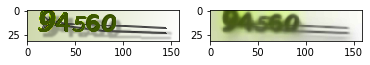

In [22]:
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(dst)